# 1 - Statesmodels: Tendência, Sazonalidade e Ruído

documentação:[statsmodels.tsa.seasonal.seasona_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose)

In [ ]:
import pandas as pd
!pip install seaborn
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [85]:
from pandas.plotting import autocorrelation_plot

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

### criando funções de plot()

In [87]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax 

In [88]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax 

## Chocolura - Análise de vendas

In [89]:
choco = pd.read_csv('chocolura.csv')
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [90]:
choco.dtypes

mes       object
vendas     int64
dtype: object

In [91]:
choco['mes'] = pd.to_datetime(choco['mes'])
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

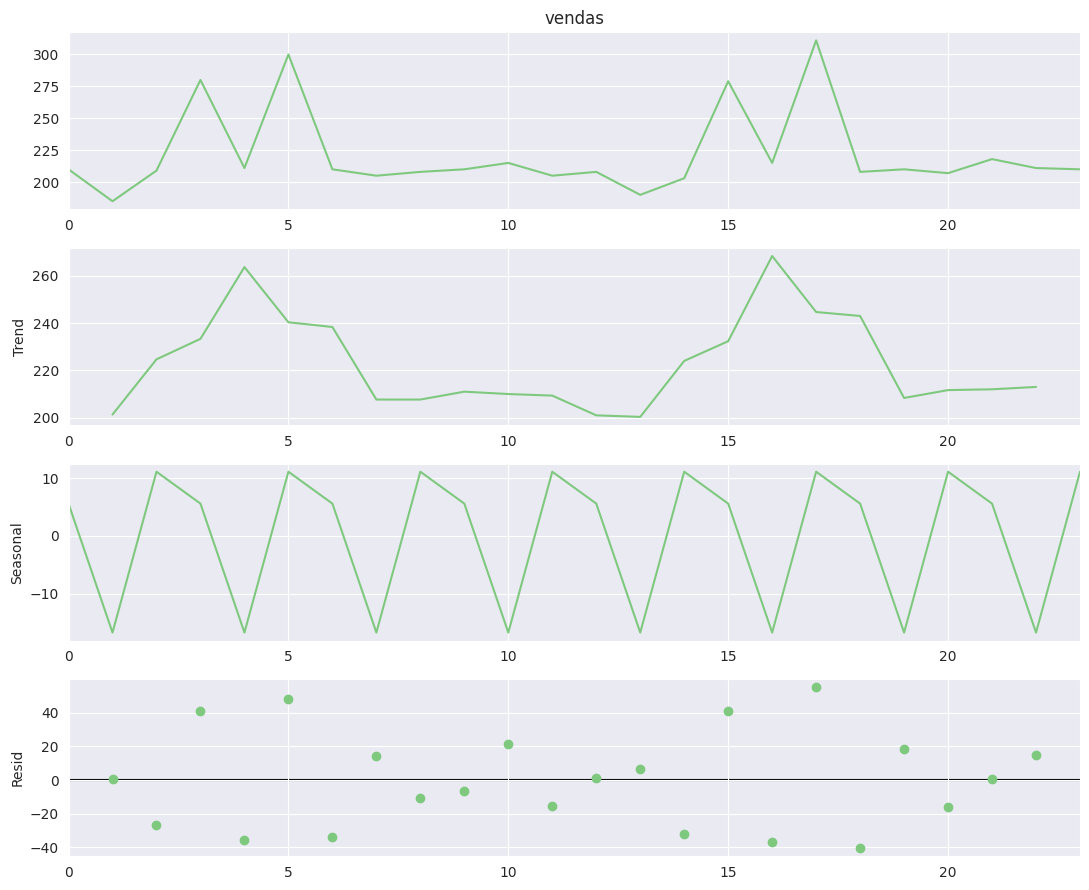

In [92]:
resultado = seasonal_decompose(x=choco.vendas, period=3)
ax = resultado.plot()

In [93]:
observado = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [94]:
data = ({
    'observado': observado,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observado,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


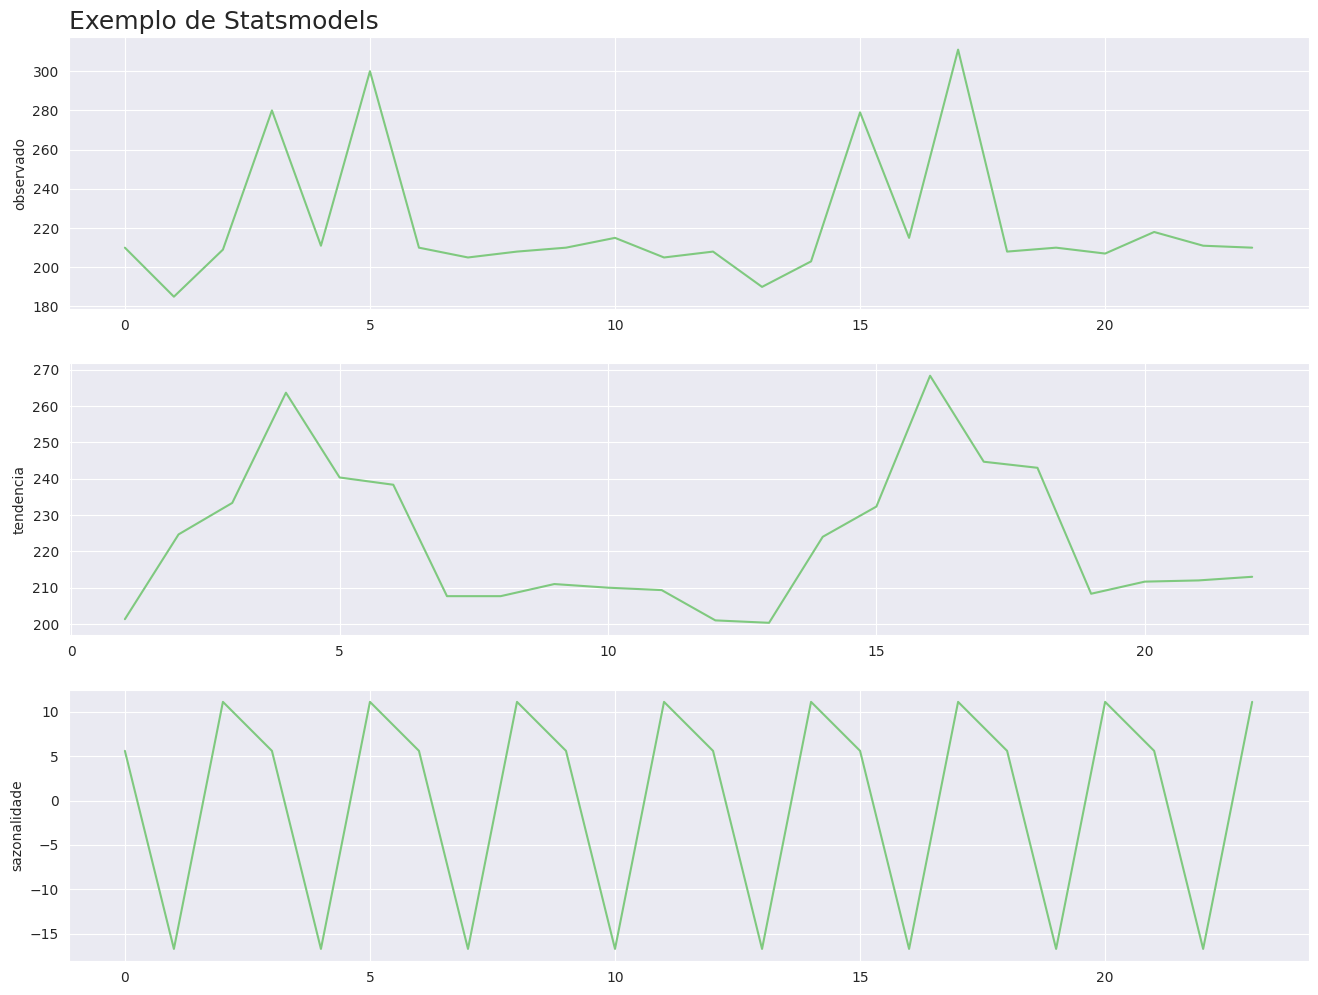

In [95]:
plot_comparacao(resultado.index, 'observado', 'tendencia', 'sazonalidade', resultado,
                'Exemplo de Statsmodels')

# 2 - Ruídos e Média Móvel

## Alucel - Análise de vendas

In [96]:
alucel = pd.read_csv('alucel.csv')

In [97]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [98]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [99]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [100]:
print('convertendo "dia" de tipo object para datetime')
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

convertendo "dia" de tipo object para datetime


dia       datetime64[ns]
vendas           float64
dtype: object

In [101]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [102]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


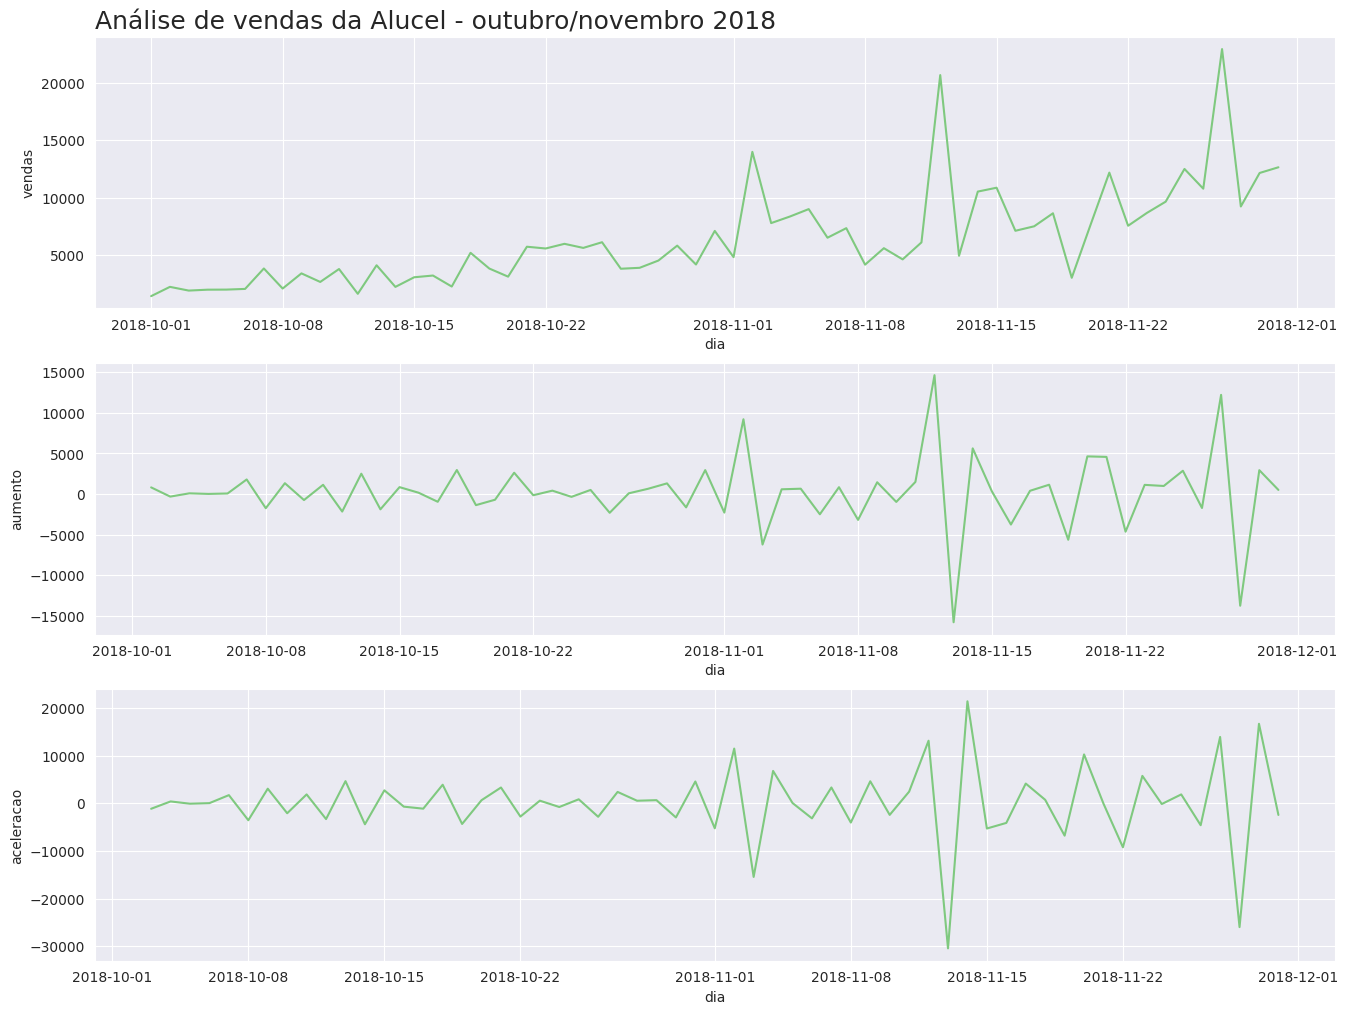

In [103]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas da Alucel - outubro/novembro 2018')

## média móvel

documentação função rolling():[pandas.Series.rolling](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html)

In [104]:
alucel['media_movel_7'] = alucel['vendas'].rolling(7).mean()

In [105]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel_7
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


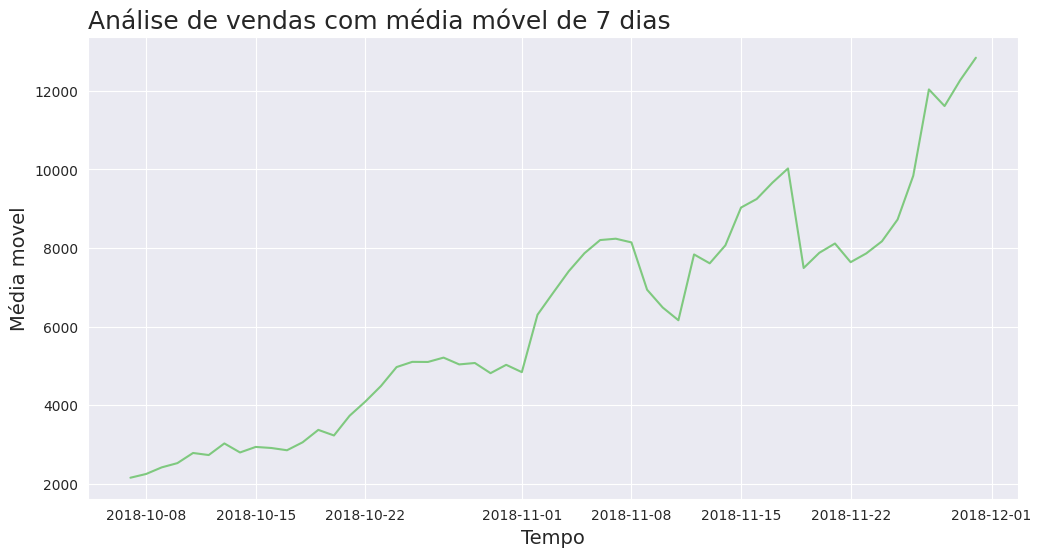

In [106]:
plotar('Análise de vendas com média móvel de 7 dias',
       'Tempo', 'Média movel', 'dia', 'media_movel_7', alucel)

In [107]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

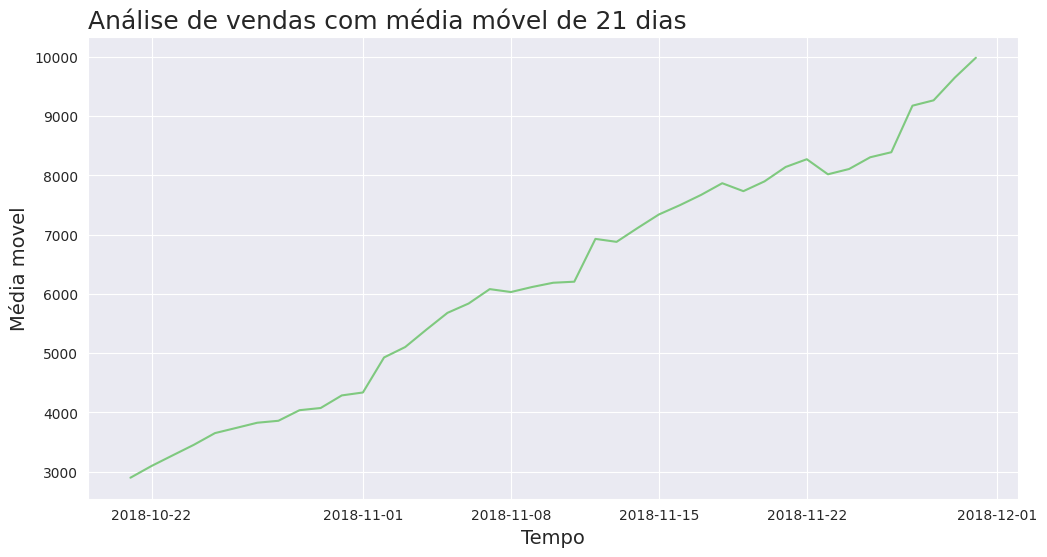

In [108]:
plotar('Análise de vendas com média móvel de 21 dias',
       'Tempo', 'Média movel', 'dia', 'media_movel_21', alucel)

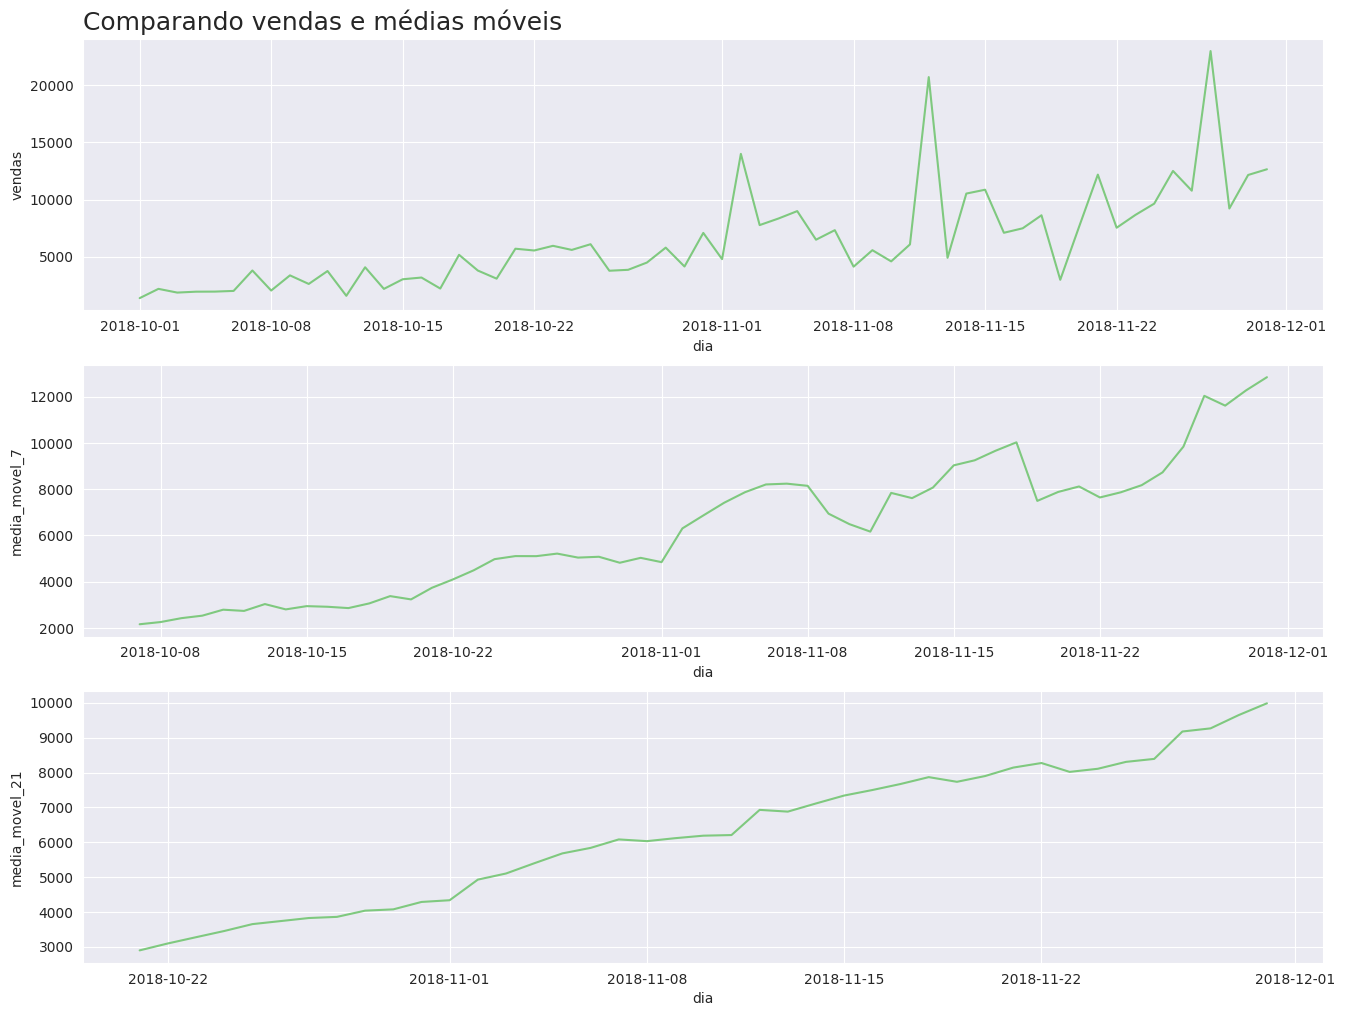

In [109]:
plot_comparacao('dia', 'vendas', 'media_movel_7', 'media_movel_21',
                alucel, 'Comparando vendas e médias móveis')